# Useful techniques

In [9]:
import numpy as np

Hot one encoding

In [1]:
sample = ['lanre! lanre cool, lanre! lanre cool', 'is rice really nice']


In [4]:
token_index = {}
for sentence in sample: 
    for word in sentence.split():
        if word not in token_index:
            token_index[word] =  1 + len(token_index)

In [6]:
token_index.get('lanre')

2

In [16]:
max_length = 10

In [17]:
results = np.zeros((len(sample), max_length, max(token_index.values()) + 1))

In [18]:
for i, sen in enumerate(sample):
    for j, word in enumerate(sen.split()):
        index = token_index.get(word)
        results[i, j, index] = 1

In [19]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

# Keras doing it automatically

In [20]:
from keras_preprocessing.text import Tokenizer

In [21]:
samples = ['The cat sat on the mat', 'my name is jeff']

In [22]:
tokeniser = Tokenizer(num_words = 1000) #1000 most common words

In [24]:
tokeniser.fit_on_texts(samples) #creats the word index

In [25]:
sequences = tokeniser.fit_on_sequences(samples)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
word_in

In [28]:
one_hot_results = tokeniser.texts_to_matrix(samples, mode = 'binary')

In [29]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Embedding Layer

In [8]:
from keras.layers import Embedding
from keras.datasets import imdb

In [9]:
embedding_layer = Embedding(1000, 64)

In [10]:
from keras import preprocessing

In [11]:
max_features = 10000

In [12]:
maxlen = 50

In [13]:
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words=max_features)

In [14]:
x_train  = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

In [16]:
x_train.shape

(25000, 50)

In [112]:
from keras.models import Sequential

In [113]:
from keras.layers import Embedding, Flatten, Dense

In [114]:
model = Sequential()

In [115]:
model.add(Embedding(max_features, 64, input_length = maxlen))

In [116]:
model.add(Flatten())

In [117]:

model.add(Dense(1, activation = 'sigmoid'))

In [118]:
model.compile(optimizer = "rmsprop", loss = 'binary_crossentropy', metrics = 'accuracy')

In [119]:
model.fit(x_train, y_train, epochs=10, batch_size = 32, validation_split=0.2 )

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5565 - accuracy: 0.7222 - val_loss: 0.4280 - val_accuracy: 0.7968
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3478 - accuracy: 0.8475 - val_loss: 0.4006 - val_accuracy: 0.8140
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2676 - accuracy: 0.8910 - val_loss: 0.4093 - val_accuracy: 0.8102
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1949 - accuracy: 0.9282 - val_loss: 0.4218 - val_accuracy: 0.8070
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1267 - accuracy: 0.9636 - val_loss: 0.4485 - val_accuracy: 0.8026
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0737 - accuracy: 0.9833 - val_loss: 0.4846 - val_accuracy: 0.7948
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0385 - accuracy: 0.9937 - val_loss: 0.5297 - val_accuracy: 0.7920
Epoch 

# Going from raw text to model

In [120]:
import os

In [121]:
imdb_dir = '/Users/Lanre94/Downloads/aclImdb' 
train_dir = os.path.join(imdb_dir, 'train')


In [127]:
labels = []
texts = []


In [128]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type) 
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname)) 
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [175]:
texts[0]

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

In [142]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [130]:
import numpy as np

Creating_index

In [133]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [134]:
tokenizer = Tokenizer(num_words=max_words)

In [145]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [146]:
sequences

[[777,
  16,
  28,
  4,
  1,
  115,
  2278,
  6887,
  11,
  19,
  1025,
  5,
  27,
  5,
  42,
  2425,
  1861,
  128,
  2270,
  5,
  3,
  6985,
  308,
  7,
  7,
  3383,
  2373,
  1,
  19,
  36,
  463,
  3169,
  2,
  222,
  3,
  1016,
  174,
  20,
  49,
  808],
 [70,
  9654,
  10,
  1,
  201,
  642,
  122,
  8,
  4517,
  2,
  10,
  255,
  1,
  17,
  176,
  734,
  5,
  103,
  187,
  33,
  5,
  94,
  9654,
  1525,
  2,
  3432,
  1679,
  69,
  145,
  99,
  642,
  167,
  4416,
  205,
  100,
  33,
  1763,
  1,
  83,
  28,
  10,
  380,
  1992,
  147,
  61,
  555,
  306,
  6,
  2246,
  4,
  9878,
  1,
  884,
  135,
  8,
  6108,
  400,
  59,
  33,
  984,
  157,
  28,
  4,
  131,
  4,
  3,
  17,
  9654,
  5456,
  562,
  27,
  1189,
  3,
  75,
  17,
  8,
  189,
  9,
  562,
  27,
  57,
  1189,
  32,
  8058,
  4,
  3,
  75,
  17,
  15,
  9,
  453,
  53,
  5,
  50,
  71,
  12,
  14,
  10,
  3348,
  5,
  866,
  148,
  9,
  10,
  1918,
  12,
  58,
  520,
  642,
  5,
  7262,
  2,
  10,
  3196,
  12,
  1

In [147]:
word_index = tokenizer.word_index

In [148]:
labels = np.array(labels)

In [149]:
data = pad_sequences(sequences, maxlen=maxlen)

In [424]:
data[1]

array([   4,    1,  911,    2, 1156, 1349,  607,   37,   48,   33,   68,
        420,    5,   27,   10,  961,    1,  158,  165,   37,    1, 4774,
        158,  165,   37, 4774,   18,  244,   37, 9127, 9951,    1,  113,
         13,  812,  379, 7135,  177,   96,   73,   15,    1,  265,    2,
          1, 3836,   40,  158,   78,  230,   15,   69,   11,  163,    1,
        433,  120,   52, 8878,   30,  115,   14,   45,    9,   68, 1437,
          5,   21,  267,  407,  968,   36,   98,   82,  362,   18,  374,
        171,   11,    6,   36,    1, 1610, 1970,    4,    3, 2247,  164,
         21,    3, 3194,   39,    3, 9447,   18,    3,  727,  912, 2247,
        164], dtype=int32)

In [152]:
indices = np.arange(data.shape[0])

In [153]:
indices

array([    0,     1,     2, ..., 24997, 24998, 24999])

In [154]:
np.random.shuffle(indices)

In [156]:
data = data[indices]

In [158]:
labels = labels[indices]

In [159]:
x_train = data[:training_samples]
y_train = labels[:training_samples]

In [162]:
x_test = data[training_samples: training_samples + validation_samples]
y_test = labels[training_samples: training_samples + validation_samples]

In [163]:
glove_dir = '/Users/Lanre94/Downloads/glove.6B'

In [164]:
embedding_index ={}

In [165]:
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

In [167]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embedding_index[word] = coefs
f.close()

In [177]:
embedding_index.get('working').shape

(100,)

In [169]:
embedding_dim = 100

In [170]:
embedding_matrix = np.zeros((max_words, embedding_dim))

In [172]:
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [173]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.44036001,  0.31821999,  0.10778   , ..., -1.29849994,
         0.11824   ,  0.64845002],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.54539001, -0.31817999, -0.016281  , ..., -0.44865   ,
         0.067047  ,  0.17975999]])

In [180]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [231]:
model = Sequential()

In [232]:
max_words

10000

In [233]:
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))

In [234]:
model.add(Flatten())

In [235]:
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [236]:
model.layers[0].set_weights([embedding_matrix])

In [237]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')
model.layers[0].trainable = False

In [238]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_13 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [239]:
history = model.fit(x_test, y_test, epochs = 10, batch_size =32, validation_data =(x_train, y_train))

Epoch 1/10
313/313 [==============================] - 4s 14ms/step - loss: 0.6629 - accuracy: 0.6252 - val_loss: 0.5945 - val_accuracy: 0.6850
Epoch 2/10
313/313 [==============================] - 4s 14ms/step - loss: 0.4272 - accuracy: 0.8078 - val_loss: 0.7636 - val_accuracy: 0.6200
Epoch 3/10
313/313 [==============================] - 4s 12ms/step - loss: 0.2859 - accuracy: 0.8853 - val_loss: 0.5438 - val_accuracy: 0.7900
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 0.1732 - accuracy: 0.9340 - val_loss: 0.5630 - val_accuracy: 0.7850
Epoch 5/10
313/313 [==============================] - 4s 13ms/step - loss: 0.0950 - accuracy: 0.9675 - val_loss: 0.6433 - val_accuracy: 0.8050
Epoch 6/10
313/313 [==============================] - 4s 13ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 1.0710 - val_accuracy: 0.6800
Epoch 7/10
313/313 [==============================] - 4s 13ms/step - loss: 0.0158 - accuracy: 0.9962 - val_loss: 0.8442 - val_accuracy: 0.8000

In [228]:
model.save_weights('pre_trained_glove_model.h5')

In [229]:
import matplotlib.pyplot as plt

In [241]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

In [242]:
epochs = range(1, len(acc) + 1)

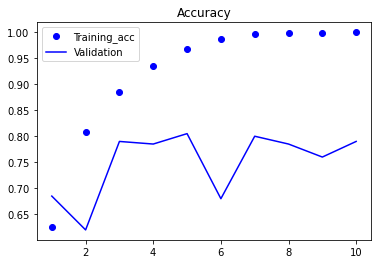

In [243]:
plt.plot(epochs, acc, 'bo', label = "Training_acc")
plt.plot(epochs, val_acc, 'b', label = "Validation")
plt.title("Accuracy")
plt.legend()

# Recurrent Neural Networks simple

In [244]:
state_t = 0

In [247]:
import numpy as np

In [248]:
timesteps = 100

In [249]:
input_features = 32

In [250]:
output_features = 64

In [252]:
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))


In [253]:

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features)) 
b = np.random.random((output_features,))

In [254]:
successive_outputs = []
for input_t in inputs:

    
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) 
    successive_outputs.append(output_t)
    state_t = output_t

In [255]:
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [256]:
final_output_sequence

array([0.99999999, 0.99999992, 0.99999999, ..., 1.        , 1.        ,
       1.        ])

# Recurrent Neural Network

In [257]:
from keras.models import Sequential

In [260]:
from keras.layers import SimpleRNN, Embedding

In [261]:
model = Sequential()

In [262]:
model.add(Embedding(10000, 32))

In [263]:
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [265]:
Model = Sequential()

In [266]:
Model.add(Embedding(10000, 32))

In [269]:
Model.add(SimpleRNN(32, return_sequences = True))
Model.add(SimpleRNN(32, return_sequences = True))

In [271]:
Model.add(SimpleRNN(32, return_sequences = True))
Model.add(SimpleRNN(32, return_sequences = True))

# Recurrent Network on Imdb

In [18]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [19]:
max_features = 10000
maxlen = 500
batch_size = 32

In [20]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [21]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)

In [22]:
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [23]:
input_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [402]:
model = Sequential()

In [403]:
model.add(Embedding(max_features, 32))

In [404]:
model.add(SimpleRNN(32))

In [405]:
model.add(Dense(1, activation = 'sigmoid'))

In [406]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics ='accuracy')

In [407]:
model.fit(input_train, y_train, epochs = 10, batch_size =159, validation_split=0.2)

Epoch 1/10
126/126 [==============================] - 23s 182ms/step - loss: 0.5471 - accuracy: 0.7151 - val_loss: 0.4405 - val_accuracy: 0.7968
Epoch 2/10
126/126 [==============================] - 22s 177ms/step - loss: 0.3555 - accuracy: 0.8500 - val_loss: 0.3690 - val_accuracy: 0.8456
Epoch 3/10
126/126 [==============================] - 25s 196ms/step - loss: 0.2897 - accuracy: 0.8844 - val_loss: 0.3802 - val_accuracy: 0.8404
Epoch 4/10
126/126 [==============================] - 18s 140ms/step - loss: 0.2341 - accuracy: 0.9111 - val_loss: 0.4337 - val_accuracy: 0.8018
Epoch 5/10
126/126 [==============================] - 19s 151ms/step - loss: 0.2153 - accuracy: 0.9148 - val_loss: 0.4469 - val_accuracy: 0.8412
Epoch 6/10
126/126 [==============================] - 26s 203ms/step - loss: 0.1742 - accuracy: 0.9365 - val_loss: 0.3734 - val_accuracy: 0.8572
Epoch 7/10
126/126 [==============================] - 26s 209ms/step - loss: 0.1373 - accuracy: 0.9496 - val_loss: 0.4256 - val_ac

# LSTM Network on Imdb

In [415]:
from keras.layers import LSTM
from keras import regularizers

In [416]:
model = Sequential()

In [417]:
model.add(Embedding(max_features, 32))

In [418]:
model.add(LSTM(32, kernel_regularizer = regularizers.l2(0.001)))

In [419]:
model.add(Dense(32, activation = 'tanh', ))

In [420]:
model.add(Dense(1, activation = 'sigmoid'))

In [421]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')

In [422]:
model.fit(input_train, y_train, epochs = 10, validation_split= 0.2, batch_size = 128)

Epoch 1/10
157/157 [==============================] - 47s 299ms/step - loss: 0.4962 - accuracy: 0.7678 - val_loss: 0.4620 - val_accuracy: 0.8352
Epoch 2/10
157/157 [==============================] - 45s 289ms/step - loss: 0.2912 - accuracy: 0.8885 - val_loss: 0.2973 - val_accuracy: 0.8816
Epoch 3/10
157/157 [==============================] - 50s 318ms/step - loss: 0.2300 - accuracy: 0.9165 - val_loss: 0.3292 - val_accuracy: 0.8722
Epoch 4/10
157/157 [==============================] - 63s 402ms/step - loss: 0.1948 - accuracy: 0.9304 - val_loss: 0.3031 - val_accuracy: 0.8924
Epoch 5/10
157/157 [==============================] - 44s 280ms/step - loss: 0.1731 - accuracy: 0.9391 - val_loss: 0.3538 - val_accuracy: 0.8726
Epoch 6/10
157/157 [==============================] - 42s 265ms/step - loss: 0.1548 - accuracy: 0.9454 - val_loss: 0.3171 - val_accuracy: 0.8760
Epoch 7/10
157/157 [==============================] - 57s 363ms/step - loss: 0.1376 - accuracy: 0.9509 - val_loss: 0.3450 - val_ac

In [423]:
x_train [0]

array([2287,  209,  141,   27,  506,   15,  718, 1104,    9,  211,  176,
       7281,  160,   30,  208,   18,   45,   22,  771, 1083,   98,   55,
         20,  496,    4,    1, 4120,   22,   77,  714,    1,  209,   51,
          9,    7,    7,    1,  174,    4,  102,   70,  292,    2,   23,
        176,  864,    8,   65,  552,   86, 1698, 5931, 2177,   38,  348,
       5301,  976,   13,   70,  253,  438,    3,  280,  759,    2,   58,
        511,    6,  425, 1734,   12,   56, 2888,    7,    7,   10,  542,
        383,   11,  507,    5,  256,   34,  491,    5,  460,   43, 1291,
         34, 7385,   15,    1, 9545,   39,   40, 3075,    5,  103,  139,
        272], dtype=int32)